## **Trabajo final grupal 2022: Properati**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Participantes: Luciano Chodaszeski y Tomás Neustadt.

En este trabajo práctico se presentará un dataset con publicaciones de propiedad de Capital Federal. Cuenta con un total de 38.656 registros y 26 variables con distintas características de las propiedades. 

Realizaremos un Modelo de Machine Learning para predecir el precio de las propiedades

Este trabajo estará dividido en 3 etapas:
- La primera será desarrollar un EDA (un análiis exploratorio sobre el dataset)
- La segunda será desarrollar un pipeline de Machine Learning para predecir la variable del precio de las propiedades de capital federal. Luego se aplicará un método de reducción de la dimensionalidad y se volverá a predecir el problema.
- Se redactará un informe técnico con la descripción del trabajo.

**Variables:**
- Unnamed: 0: Variable de contador de registros (no será utilizada en nuestro análisis)
- Id: Numero identificatorio de la publicación
- ad_type: Tipo de publicación
- start_date: Fecha de inicio de la publicación
- end_date: Fecha de fin de la publicación
- created_on: Fecha creada de la publicación
- lat: Latitud de la propiedad
- lon: Longitud de la propiedad
- l1: Ubicación 1 de la propiedad
- l2: Ubicación 2 de la propiedad
- l3: Ubicación 3 de la propiedad
- l4: Ubicación 4 de la propiedad
- l5: Ubicación 5 de la propiedad
- l6: Ubicación 6 de la propiedad
- rooms: Cantidad de ambientes de la propiedad
- bedrooms: Cantidad de habitaciones de la propiedad
- bathrooms: Cantidad de baños de la propiedad
- surface_total: m2 total de la propiedad
- surface_covered: m2 cubiertos de la propiedad
- precio: Precio de la propiedad (variable a predecir)
- currency: Moneda del precio
- price_period: Periodo del precio
- title: Título de la publicación
- description: Descripción de la publicación
- property_type: Tipo de la propiedad
- operation_type: Tipo de operación

In [1]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# **Pre Procesamiento**

Lo primero que haremos será importar el data set bajo el nombre "properati" y corroborar que se haya cargado correctamente

In [3]:
pwd

'/Users/tneustadt/Documents/Ciencia-de-Datos/tp-final'

In [4]:
ls

Diccionario_Properati.xlsx
clusterai_tomas_neustadt.ipynb
clusterai_tomas_neustadt_eda.ipynb
clusterai_tomas_neustadt_machine_learning.ipynb
properati_capital.csv


In [5]:
properati = pd.read_csv('properati_capital.csv', delimiter=',', encoding='latin-1')


In [6]:
properati.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,63934,MlnOILxnUwm3KXFnNyOJig==,Propiedad,2020-07-06,2021-04-07,2020-07-06,-34.618041,-58.475124,Argentina,Capital Federal,...,1.0,NaN,NaN,89000.0,USD,NaN,Galicia 2800 Depto 2 Ambientes Con BalcÃ³n Vil...,XINTEL(JUM-JUM-313) \n\nExcelente departament...,Departamento,Venta
1,660204,FiY707h094LvsqOGHohO9Q==,Propiedad,2020-07-17,9999-12-31,2020-07-17,-34.620686,-58.453972,Argentina,Capital Federal,...,2.0,NaN,NaN,190000.0,USD,NaN,DEPARTAMENTO A ESTRENAR AL FRENTE CON COCHERA,EXCELENTE DPTO A ESTRENAR AL FRENTE CON COCHER...,Departamento,Venta
2,961496,VKAgMtgXuRfeD2XHnLPWNQ==,Propiedad,2020-06-19,2020-12-03,2020-06-19,-34.590569,-58.425215,Argentina,Capital Federal,...,2.0,98.0,68.0,360000.0,USD,NaN,Excelente departamento 4 ambientes con terraza...,Patio El Salvador . inicio de obra nmarzo 2019...,Departamento,Venta
3,292569,H56oekWpzEOKT5aXM43WLA==,Propiedad,2021-02-24,2021-03-01,2021-02-24,-34.577440,-58.485041,Argentina,Capital Federal,...,1.0,118.0,96.0,285000.0,USD,NaN,Venta depto 4 ambientes/terraza en V. Urquiza,Corredor Responsable: MARIANO AUFSEHER - CPI 4...,Departamento,Venta
4,278737,FPPomZ4bizdYOzH9KlsLDg==,Propiedad,2020-11-17,2021-04-13,2020-11-17,-34.615851,-58.439566,Argentina,Capital Federal,...,1.0,61.0,52.0,145000.0,USD,NaN,Departamento de 2 ambientes c terraza a estrenar,Corredor Responsable: MARCELO GRUNBAUM - CMCPS...,Departamento,Venta


Ahora lo que haremos será imprimir las dimensiones del dataset y eliminar la variable "Unnamed: 0". Luego volveremos a guardar el dataset sin esta variable bajo el nombre properati.

In [7]:
properati.shape

(38656, 26)

In [8]:
properati = properati.iloc [:, 1:26]

In [9]:
properati.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,MlnOILxnUwm3KXFnNyOJig==,Propiedad,2020-07-06,2021-04-07,2020-07-06,-34.618041,-58.475124,Argentina,Capital Federal,Villa del Parque,...,1.0,NaN,NaN,89000.0,USD,NaN,Galicia 2800 Depto 2 Ambientes Con BalcÃ³n Vil...,XINTEL(JUM-JUM-313) \n\nExcelente departament...,Departamento,Venta
1,FiY707h094LvsqOGHohO9Q==,Propiedad,2020-07-17,9999-12-31,2020-07-17,-34.620686,-58.453972,Argentina,Capital Federal,Caballito,...,2.0,NaN,NaN,190000.0,USD,NaN,DEPARTAMENTO A ESTRENAR AL FRENTE CON COCHERA,EXCELENTE DPTO A ESTRENAR AL FRENTE CON COCHER...,Departamento,Venta
2,VKAgMtgXuRfeD2XHnLPWNQ==,Propiedad,2020-06-19,2020-12-03,2020-06-19,-34.590569,-58.425215,Argentina,Capital Federal,Palermo,...,2.0,98.0,68.0,360000.0,USD,NaN,Excelente departamento 4 ambientes con terraza...,Patio El Salvador . inicio de obra nmarzo 2019...,Departamento,Venta
3,H56oekWpzEOKT5aXM43WLA==,Propiedad,2021-02-24,2021-03-01,2021-02-24,-34.577440,-58.485041,Argentina,Capital Federal,Villa Urquiza,...,1.0,118.0,96.0,285000.0,USD,NaN,Venta depto 4 ambientes/terraza en V. Urquiza,Corredor Responsable: MARIANO AUFSEHER - CPI 4...,Departamento,Venta
4,FPPomZ4bizdYOzH9KlsLDg==,Propiedad,2020-11-17,2021-04-13,2020-11-17,-34.615851,-58.439566,Argentina,Capital Federal,Caballito,...,1.0,61.0,52.0,145000.0,USD,NaN,Departamento de 2 ambientes c terraza a estrenar,Corredor Responsable: MARCELO GRUNBAUM - CMCPS...,Departamento,Venta


Corroboramos que el dataset no cuenta con valores nulos, en caso de que una columna tenga un alto porcentaje de valores nulos la eliminaremos. En cambio, para aquellas columnas que cuenten con bajo valor de nulos, eliminaremos las columnas que tengan nulos.

In [10]:
properati.isnull().sum().sort_values(ascending=False)

l6                 38656
price_period       38656
l5                 38656
l4                 37511
surface_total      16011
surface_covered    15978
bedrooms            7535
rooms               2561
bathrooms           2336
lat                 2071
lon                 2071
l3                   137
title                  0
description            0
property_type          0
price                  0
currency               0
id                     0
ad_type                0
l2                     0
l1                     0
created_on             0
end_date               0
start_date             0
operation_type         0
dtype: int64

In [11]:
#Eliminaremos estas 4 columnas ya que cuentan con valores nulos en un gran porcentaje (casi el 100%) del dataset
properati.drop('l6', inplace=True, axis=1)
properati.drop('price_period', inplace=True, axis=1)
properati.drop('l4', inplace=True, axis=1)
properati.drop('l5', inplace=True, axis=1)

In [12]:
properati.shape

(38656, 21)

In [13]:
#eliminamos los renglones con valores nulos del dataset
properati.dropna(how ='any', inplace = True, subset=['l3','lon','lat','bathrooms','rooms'])

Ahora verificaremos los distintos valores posibles que tiene cada columna, eliminando las columnas con valores unicos ya que no son representativas para el modelo.

In [14]:
properati.nunique()

id                 25355
ad_type                1
start_date           361
end_date             434
created_on           361
lat                16022
lon                16066
l1                     1
l2                     1
l3                    56
rooms                 18
bedrooms              17
bathrooms              9
surface_total        449
surface_covered      370
price               3183
currency               1
title              18592
description        22706
property_type          2
operation_type         1
dtype: int64

In [15]:
properati.drop('ad_type', inplace=True, axis=1)
properati.drop('l1', inplace=True, axis=1)
properati.drop('l2', inplace=True, axis=1)
properati.drop('currency', inplace=True, axis=1)
properati.drop('operation_type', inplace=True, axis=1)

In [16]:
properati.shape #imprimimos las dimensiones del data set

(32278, 16)

Ahora verificaremos los distintos valores posibles que tiene cada columna, eliminando las columnas con valores unicos ya que no son representativas para el modelo.

In [17]:
properati.nunique()

id                 25355
start_date           361
end_date             434
created_on           361
lat                16022
lon                16066
l3                    56
rooms                 18
bedrooms              17
bathrooms              9
surface_total        449
surface_covered      370
price               3183
title              18592
description        22706
property_type          2
dtype: int64

Como "ID" es una variable única para cada propiedad, y podemos ver como hay 25355 valores de ID con un dataset de 32278 renglones, sacamos como conclusión que existen valores duplicados por lo que los eliminaremos del dataset.

In [18]:
properati.drop_duplicates(subset=['id'], keep='first', inplace=True, ignore_index=False)

Muestro los tipos de datos que contiene cada columna. Las que sean objeto y no representativas de mi modelo las elimino. 

In [19]:
properati.shape

(25355, 16)

In [20]:
properati.dtypes

id                  object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
title               object
description         object
property_type       object
dtype: object

In [21]:
#eliminamos unnamed_0,id, start_date, end_Date, created_on, title, description
properati.drop('id', inplace=True, axis=1) #ya que puedo utilizar como identificador el número de renglon
properati.drop('start_date', inplace=True, axis=1) #ya que no me sirven las fechas de la publicación
properati.drop('end_date', inplace=True, axis=1) #ya que no me sirven las fechas de la publicación
properati.drop('created_on', inplace=True, axis=1) #ya que no me sirven las fechas de la publicación
properati.drop('title', inplace=True, axis=1) #el titulo no es representativo
properati.drop('description', inplace=True, axis=1) #la descripción no es representativa de la propiedad, ya que es un resumen de las características de la misma

In [22]:
properati.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.618041,-58.475124,Villa del Parque,2.0,1.0,1.0,NaN,NaN,89000.0,Departamento
1,-34.620686,-58.453972,Caballito,3.0,2.0,2.0,NaN,NaN,190000.0,Departamento
2,-34.590569,-58.425215,Palermo,3.0,2.0,2.0,98.0,68.0,360000.0,Departamento
3,-34.577440,-58.485041,Villa Urquiza,4.0,4.0,1.0,118.0,96.0,285000.0,Departamento
4,-34.615851,-58.439566,Caballito,2.0,11.0,1.0,61.0,52.0,145000.0,Departamento


In [23]:
properati['surface_total'].fillna(properati['surface_total'].mean(), inplace = True)
properati['surface_covered'].fillna(properati['surface_covered'].mean(), inplace = True)
properati['bedrooms'].fillna(properati['bedrooms'].median(), inplace = True)

In [24]:
properati.isnull().sum().sort_values(ascending=False)

lat                0
lon                0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [25]:
properati.shape

(25355, 10)

# **EDA**

Realizaremos un heatmap para poder analizar la correlación de las variables

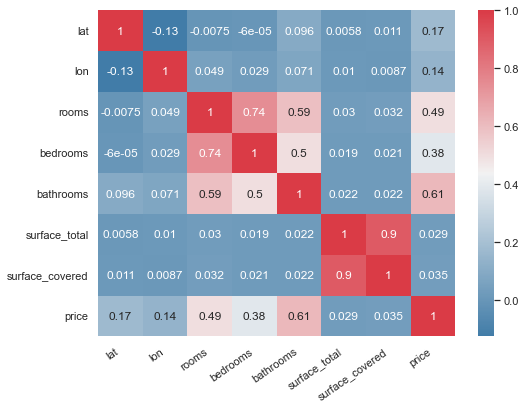

In [26]:
sns.set_theme(style="whitegrid")
corrmat = properati.corr()
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
plt.show()

Realizaremos un histplot para poder analizar la distribución del precio

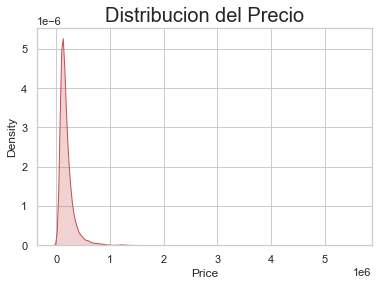

In [27]:
#sns.histplot
sns.kdeplot(properati.price, color="r", shade = True)
plt.xlabel("Price")
plt.title('Distribucion del Precio',size = 20)
plt.show()

In [28]:
price_quantile90 = properati.price.quantile(0.90)
properati = properati.loc[(properati.price < price_quantile90)]
print(properati.shape)

(22815, 10)


<AxesSubplot:xlabel='price', ylabel='Count'>

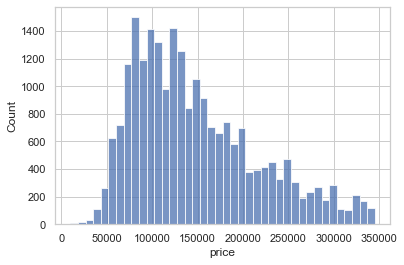

In [29]:
sns.histplot(data=properati, x="price", bins= 40)

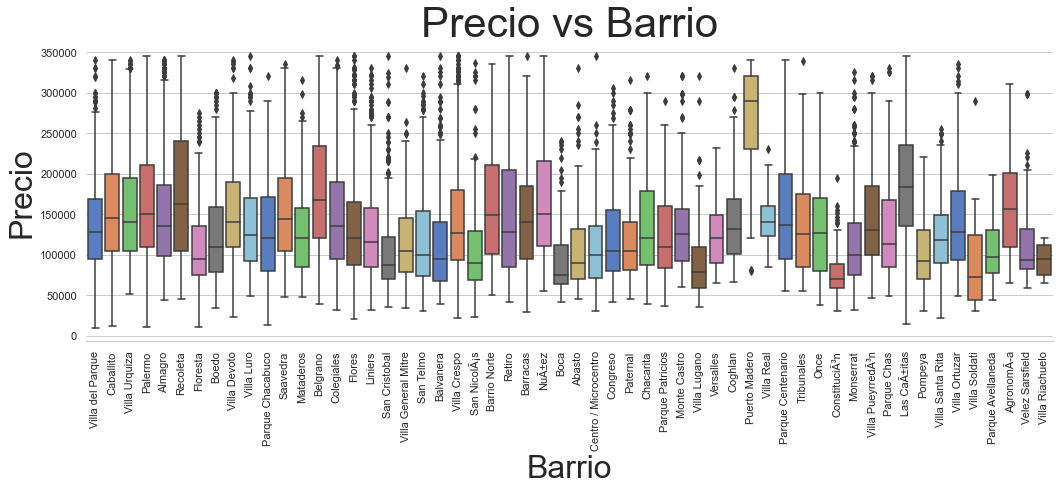

In [30]:
#Boxplot de la variable log_precio
g = sns.catplot(data=properati,
                x='l3',y='price', 
                kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.xlabel("Barrio",fontsize=32)
plt.ylabel("Precio",fontsize=32)
plt.title('Precio vs Barrio',size = 42)
plt.show()

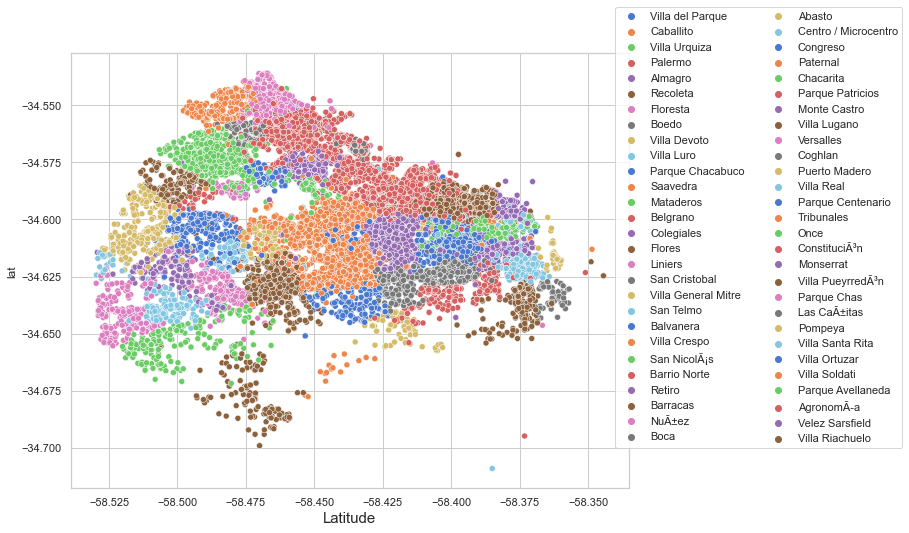

In [31]:
plt.figure(figsize=(10,8))
g = sns.scatterplot(x=properati.lon,y=properati.lat,
                hue=properati.l3,palette='muted')
plt.xlabel("Longitude",fontsize=15)
plt.xlabel("Latitude",fontsize=15)
g.legend(loc='right', bbox_to_anchor=(1.5, 0.6), ncol=2)

plt.show()

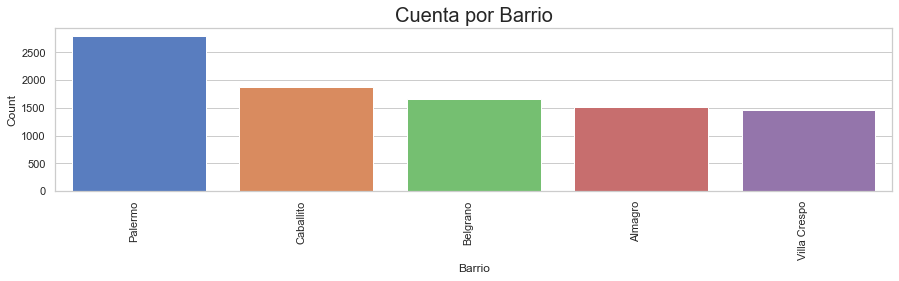

In [32]:
barrios_poblados = properati['l3'].value_counts().index[0:5]

plt.figure(figsize=(15,3))
g = sns.countplot(x='l3',data=properati, palette = "muted", order=barrios_poblados)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cuenta por Barrio',size = 20)
plt.xlabel("Barrio")
plt.ylabel("Count")
plt.show()

# **Machine Learning**

Genero las variables Dummies con las dos features que si son representativas y son de tipo objeto : l3 y property_type

In [33]:
l3_dummies = pd.get_dummies(properati['l3'])
l3_dummies.shape

(22815, 56)

In [34]:
ptype_dummies = pd.get_dummies(properati['property_type'])
ptype_dummies.shape

(22815, 2)

Agrego las variables Dummies al dataset

In [35]:
properati = pd.concat([properati, l3_dummies, ptype_dummies],axis=1) 

In [36]:
y = np.array(properati[["price"]])
x = properati.drop(['lat','lon','price','l3','property_type'], axis=1)

In [37]:
x.shape

(22815, 63)

In [38]:
y.shape

(22815, 1)

Divido el dataset entre Train y Test, tomando un test_size del 30%. 

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y, test_size=0.3, random_state=4)

In [40]:
x.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,Abasto,AgronomÃ­a,Almagro,Balvanera,Barracas,...,Villa Ortuzar,Villa PueyrredÃ³n,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,Departamento,PH
0,2.0,1.0,1.0,123.496416,94.800184,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,3.0,2.0,2.0,123.496416,94.800184,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4.0,4.0,1.0,118.000000,96.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2.0,11.0,1.0,61.000000,52.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3.0,2.0,1.0,66.000000,58.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [41]:
xtrain_nd = xtrain[:, 0:5] #sin dummies
xtrain_nd.shape

(15970, 5)

In [42]:
xtrain_d = xtrain[:, 5:] #con dummies
xtrain_d.shape

(15970, 58)

In [43]:
xtest_nd = xtest[:, 0:5] #sin dummies
xtest_nd.shape

(6845, 5)

In [44]:
xtest_d = xtest[:, 5:] #con dummies
xtest_d.shape

(6845, 58)

Con el StandardScaler generado en la linea siguiente, realizaremos el tansform para el xtrain y xtest guardandolos en nuevas variables llamadas "xtrain_scal" y "xtest_scal". Realizaremos la estandarización de las variables no dummies.

In [45]:
scaler = preprocessing.StandardScaler().fit(xtrain_nd)

In [46]:
xtrain_scal = scaler.transform(xtrain_nd)

In [47]:
xtest_scal = scaler.transform(xtest_nd)

In [48]:
xtrain_scal = np.concatenate([xtrain_scal, xtrain_d],axis=1)
xtest_scal = np.concatenate([xtest_scal, xtest_d],axis=1)

**KNN**

In [49]:
knn = KNeighborsRegressor(weights = "distance")
parameters_k = np.arange(8,15,2)
parameters_knn = [{'n_neighbors': parameters_k}]
regressor_knn = GridSearchCV(knn, parameters_knn, refit = True, cv=5, verbose=True)

In [50]:
regressor_knn.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid=[{'n_neighbors': array([ 8, 10, 12, 14])}],
             verbose=True)

In [51]:
regressor_knn.best_params_

{'n_neighbors': 14}

In [52]:
ypred= regressor_knn.predict(xtest_scal)

In [53]:
mse_knn = np.sqrt(mean_squared_error(ytest, ypred))
mse_knn

37880.65375120144

**Support Vector Regressor**

Creamos un Suport Vector Regressor y un GridSearch para realizar la búsqueda de hiperparámetros. Asignamos dos posibles valores para el parámetro "kernel" y tres posibles valores para "C" y "gamma".
Hacemos 5 CrossValidations.

In [54]:
svreg = SVR()

In [55]:
param_svreg = {'kernel':('linear', 'rbf'), 'C':[1, 10,100 ], 'gamma':[ 0.1,1,10]}

In [56]:
regressor_svr = GridSearchCV(svreg , param_svreg, cv = 5, n_jobs = -1, verbose = True, refit = True)

In [57]:
regressor_svr.fit(xtrain_scal, ytrain.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             verbose=True)

Mostramos cuales son los mejores hiperparámetros y con estos obtenemos el mean_squared_error en el test set.

In [58]:
regressor_svr.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}

In [59]:
regressor_svr.best_score_

0.5075353717196894

In [60]:
ypred2 = regressor_svr.predict(xtest_scal)
ypred2

array([187433.16569563, 213344.16136056, 139673.35365799, ...,
        80463.11869267, 183161.52423989, 137169.41208949])

In [61]:
mse_svr = np.sqrt(mean_squared_error(ytest, ypred2))
mse_svr

47183.48928983047

Visualización

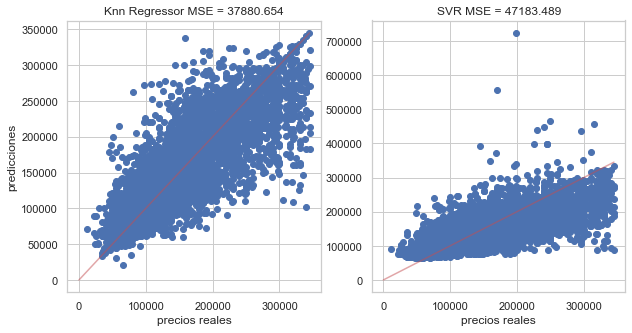

In [62]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(x=ytest,y=ypred)
ax[0].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[0].set_title('Knn Regressor MSE = '+str(np.round(mse_knn,3)))
ax[0].set_xlabel('precios reales')
ax[0].set_ylabel('predicciones')
ax[1].scatter(x=ytest,y=ypred2)
ax[1].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[1].set_title('SVR MSE = '+str(np.round(mse_svr,3)))
ax[1].set_xlabel('precios reales')
plt.show()

**PCA**

Ahora reduciremos la dimensionalidad con PCA, y haremos denuevo la predicción del precio pero con las dos features mas importantes del dataset.

In [63]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 2
#definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
pca.fit(xtrain_scal)
xpcatrain = pca.transform(xtrain_scal)
xpcatest = pca.transform(xtest_scal)
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [64]:
pca.explained_variance_

array([2.05096596, 1.92785336])

In [65]:
pca.explained_variance_ratio_

array([0.33370439, 0.31367324])

In [66]:
xpcatrain.shape

(15970, 2)

**KNN con PCA**

In [67]:
regressor_knn.fit(xpcatrain, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid=[{'n_neighbors': array([ 8, 10, 12, 14])}],
             verbose=True)

In [68]:
regressor_knn.best_params_

{'n_neighbors': 14}

In [69]:
ypred3 = regressor_knn.predict(xpcatest)

In [70]:
mse_knn2 = np.sqrt(mean_squared_error(ytest, ypred3))
mse_knn2
#Aumentó el error respecto del modelo sin PCA

39996.30472936236

**SVR con PCA**

In [71]:
svreg = SVR()
param_svreg = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100], 'gamma':[ 0.1,1,10]}
regressor_svr = GridSearchCV(svreg, param_svreg, cv=4, verbose=True)
regressor_svr.fit(xpcatrain, ytrain.ravel())

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             verbose=True)

In [72]:
regressor_svr.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [73]:
regressor_svr.best_score_

0.4274954423171763

In [74]:
ypred4 = regressor_svr.predict(xpcatest)
ypred4

array([164455.0544752 , 185052.64010928, 127223.87769438, ...,
        97495.5885513 , 195813.7126383 , 127850.02199173])

In [75]:
mse_svr2 = np.sqrt(mean_squared_error(ytest, ypred4))
mse_svr2

50962.6397798865

**Visualización**

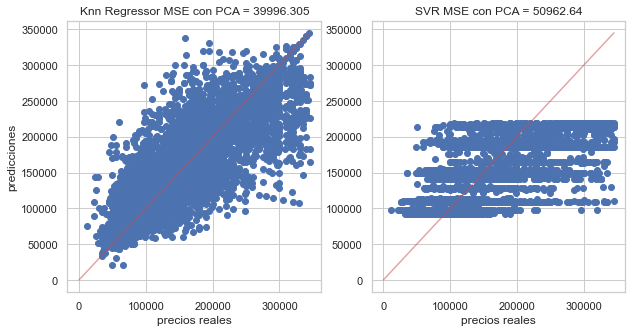

In [76]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(x=ytest,y=ypred3)
ax[0].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[0].set_title('Knn Regressor MSE con PCA = '+str(np.round(mse_knn2,3)))
ax[0].set_xlabel('precios reales')
ax[0].set_ylabel('predicciones')
ax[1].scatter(x=ytest,y=ypred4)
ax[1].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[1].set_title('SVR MSE con PCA = '+str(np.round(mse_svr2,3)))
ax[1].set_xlabel('precios reales')
plt.show()